In [1]:
suppressPackageStartupMessages({
  library(Seurat)
  library(monocle3)
  library(SeuratWrappers)
  library(dplyr)
  library(Matrix)
  library(ggplot2)
  library(patchwork)
  library(SingleCellExperiment)
  library(ggplot2)
  library(viridis)
})

Warning message:
“package ‘Seurat’ was built under R version 4.4.3”
Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Warning message:
“package ‘sp’ was built under R version 4.4.3”


Warning message:
“package ‘monocle3’ was built under R version 4.4.3”
Warning message:
“package ‘matrixStats’ was built under R version 4.4.3”
Warning message:
“package ‘dplyr’ was built under R version 4.4.3”
Warning message:
“package ‘Matrix’ was built under R version 4.4.3”
Warning message:
“package ‘patchwork’ was built under R version 4.4.3”
Warning message:
“package ‘viridis’ was built under R version 4.4.3”
Warning message:
“package ‘viridisLite’ was built under R version 4.4.3”


In [2]:
adult_obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/annotated/myeloid_clean_annotated.rds')
adult_obj

An object of class Seurat 
69212 features across 94270 samples within 2 assays 
Active assay: SCT (30606 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [3]:
table(adult_obj$general_cell_type)


   C1Q_MHCII_TAM          HSP_TAM      Hypoxic_TAM          IFN_TAM 
           22753             1306            10159             9421 
Inflammatory_TAM         MERT_TAM         Monocyte       Neutrophil 
            7800            25707             5158             6503 
        SPP1_TAM 
            5463 

In [4]:
malignant_obj <- subset(
  adult_obj,
  subset = general_cell_type != 'Neutrophil'
)

dim(malignant_obj)

[1] 30606 87767

In [5]:
malignant_obj@meta.data |> head(2)
malignant_obj$general_cell_type |> unique()
malignant_obj

orig.ident  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010
                                                                                        nCount_RNA
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 1175      
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 4284      
                                                                                        nFeature_RNA
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  713        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 2090        
                                                                                        project_id  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010
                                                                                        orig_sample_id                          
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010__filtered_feature_bc_matrix
                                                                                        sample_uid                                                          
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099
                                                                                        genome
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 GRCh38
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 GRCh38
                                                                                        chemistry
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 10x      
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 10x      
                                                                                        percent.mt
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 10.978723 
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1  1.960784 
                                                                                        doublet_class
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 singlet      
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 singlet      
                                                                                        ⋯
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 ⋯
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 ⋯
                                                                                        SCT_snn_res.0.2
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 0              
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 4              
                                                                                        SCT_snn_res.0.4
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 0              
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matr

[1] "C1Q_MHCII_TAM"    "MERT_TAM"         "Hypoxic_TAM"      "SPP1_TAM"        
[5] "Monocyte"         "Inflammatory_TAM" "IFN_TAM"          "HSP_TAM"

An object of class Seurat 
69212 features across 87767 samples within 2 assays 
Active assay: SCT (30606 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [6]:
DefaultAssay(malignant_obj) <- "SCT"  # critical for as.cell_data_set()

In [7]:
cds <- as.cell_data_set(malignant_obj)

cds

Warning message:
“Monocle 3 trajectories require cluster partitions, which Seurat does not calculate. Please run 'cluster_cells' on your cell_data_set object”


class: cell_data_set 
dim: 30606 87767 
metadata(0):
assays(2): counts logcounts
rownames(30606): ENSG00000238009 ENSG00000241860 ... ENSG00000287806
  AVPR2
rowData names(0):
colnames(87767):
  PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1
  PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1
  ...
  PRJNA995768__PRJNA995768__filtered_feature_bc_matrix__SAMN36505073_TTTGTCAAGGCGACAT-1
  PRJNA995768__PRJNA995768__filtered_feature_bc_matrix__SAMN36505073_TTTGTCACATGTCCTC-1
colData names(36): orig.ident nCount_RNA ... ident Size_Factor
reducedDimNames(3): PCA HARMONY UMAP.HARMONY
mainExpName: SCT
altExpNames(0):

In [8]:
head(colnames(cds))
head(rownames(cds))

colData(cds) |> as.data.frame() |> head()
rowData(cds) |> as.data.frame() |> head()

[1] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1"
[2] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1"
[3] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1"
[4] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1"
[5] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1"
[6] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1"

[1] "ENSG00000238009" "ENSG00000241860" "ENSG00000290385" "ENSG00000291215"
[5] "LINC01409"       "ENSG00000290784"

orig.ident  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010
                                                                                        nCount_RNA
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  1175     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1  4284     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 44655     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 29414     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1  3246     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 10869     
                                                                                        nFeature_RNA
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  713        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 2090        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 6053        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 6000        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 1661        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 3658        
                                                                                        project_id  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010
                                                                                        orig_sample_id                          
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010__filtered_feature_bc_matrix
                                                                                        sample_uid                                                          
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__S

ENSG00000238009
ENSG00000241860
ENSG00000290385
ENSG00000291215
LINC01409      
ENSG00000290784

In [9]:
if (is.null(rowData(cds)$gene_short_name)) {
  rowData(cds)$gene_short_name <- rownames(cds)
}

In [10]:
# Ensure the same cells (order) in Seurat and CDS
all(colnames(malignant_obj) == colnames(cds))
# If FALSE, reorder:

cds <- cds[, colnames(malignant_obj)]

[1] TRUE

In [11]:
# Extract Harmony embeddings
harm <- Embeddings(malignant_obj, "harmony")  # matrix: cells x dims
dim(harm)
head(harm[, 1:5])

[1] 87767    50

harmony_1 
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 -15.853236
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1  22.125178
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1   8.980117
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1   5.923652
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 -32.005983
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1  12.945955
                                                                                        harmony_2
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 -3.342554
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1  9.117247
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1  8.632856
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1  6.077793
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 60.602893
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 -8.079107
                                                                                        harmony_3 
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  -3.621113
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1   6.421647
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 -10.406330
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1   5.129676
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1   9.543225
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1   7.518873
                                                                                        harmony_4  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  -0.5052105
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1  -8.5346568
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1   4.7819766
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1  -2.6559370
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1  -9.7325562
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 -12.7057660
                                                                                        harmony_5
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  2.643085
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 14.700782
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 19.964667
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 11.818529
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 -9.457936
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1  9.907307

In [12]:
num_dim <- min(50, ncol(harm))
harm_use <- harm[, 1:num_dim]

In [13]:
cds <- preprocess_cds(
  cds,
  num_dim = num_dim,                # same as Harmony
  method = "PCA",
  norm_method = "log"               # fine for SCT
)

In [14]:
reducedDims(cds)$PCA <- harm_use

In [15]:
umap_harm <- Embeddings(malignant_obj, "umap.harmony")
reducedDims(cds)$UMAP <- umap_harm

In [16]:
# cds <- reduce_dimension(
#   cds,
#   reduction_method   = "UMAP",
#   preprocess_method  = "PCA",
#   umap.metric        = "cosine",
#   umap.min_dist      = 0.1,
#   umap.n_neighbors   = 30L
# )

In [17]:
cds <- cluster_cells(
  cds,
  reduction_method = "UMAP",
  k = 20          # adjust; smaller = fewer, bigger = more clusters
)

table(partitions(cds))
table(clusters(cds))


    1     2 
87670    97 


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
5664 5099 4912 4869 4461 4373 4010 3812 3774 3606 3194 3182 2969 2928 2718 2663 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
2536 2453 2415 2092 2057 2039 1988 1775 1669 1666 1344 1262 1171  944   97   25 

In [18]:
cds <- learn_graph(
  cds,
  use_partition = TRUE,     # or FALSE if you want one global trajectory
  close_loop = FALSE        # TRUE if you suspect cycles
)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”


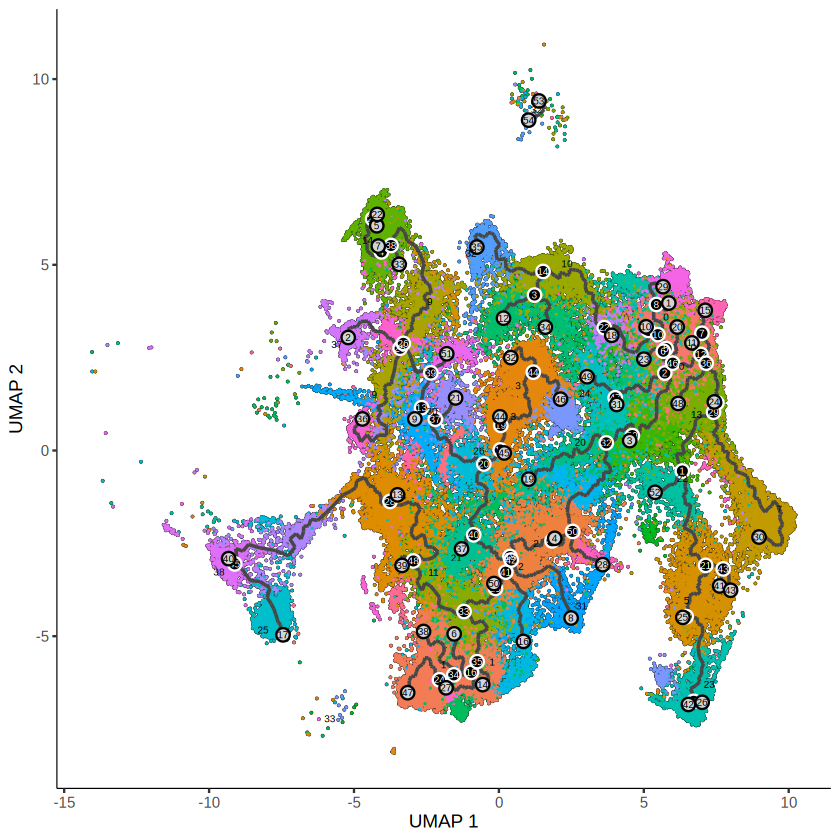

In [19]:
plot_cells(
  cds,
  color_cells_by = "seurat_clusters",  # or any meta column
  label_groups_by_cluster = TRUE,
  label_leaves = TRUE,
  label_branch_points = TRUE
)

In [20]:
get_earliest_principal_node <- function(cds, time_bin="Monocyte"){
  cell_ids <- which(colData(cds)[, "general_cell_type"] == time_bin)

  closest_vertex <-
    cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])

  root_pr_nodes <-
    igraph::V(principal_graph(cds)[["UMAP"]])$name[
      as.numeric(names(which.max(table(closest_vertex[cell_ids, ]))))
    ]

  root_pr_nodes
}

cds <- order_cells(cds, root_pr_nodes = get_earliest_principal_node(cds))

In [21]:
# table(colData(cds)$general_cell_type)

# root_cells <- colnames(cds)[cds$general_cell_type == "OPC_like"]

# length(root_cells)

# cds <- order_cells(
#   cds,
#   root_cells = root_cells
# )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   20.86   28.57     Inf   34.09     Inf 

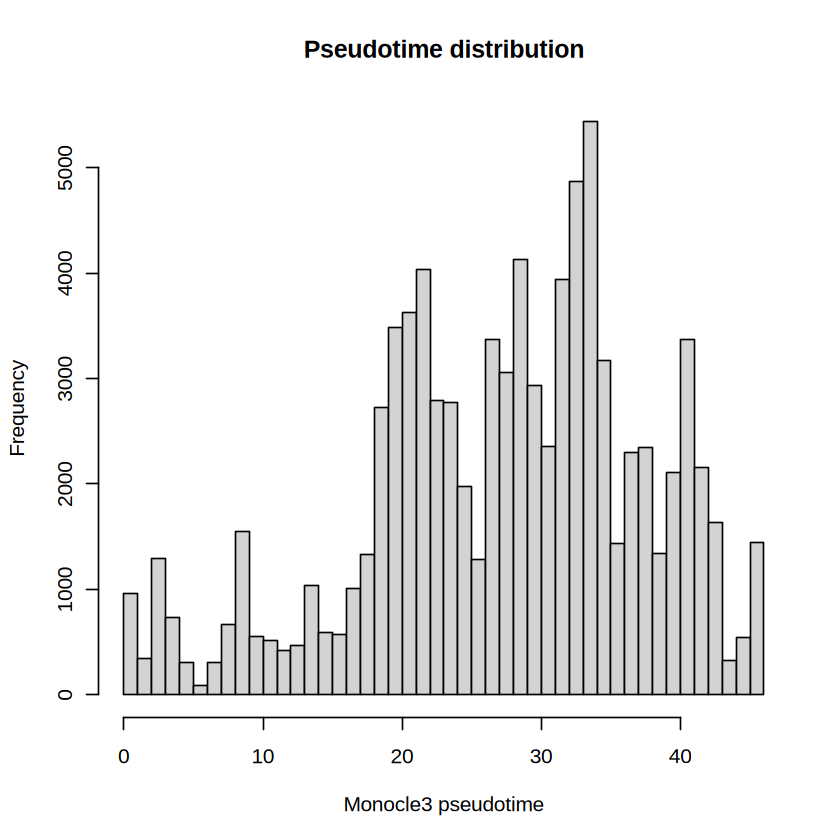

In [22]:
pseudo <- pseudotime(cds)
summary(pseudo)

# Example: show distribution
hist(pseudo, breaks = 50, main = "Pseudotime distribution", xlab = "Monocle3 pseudotime")

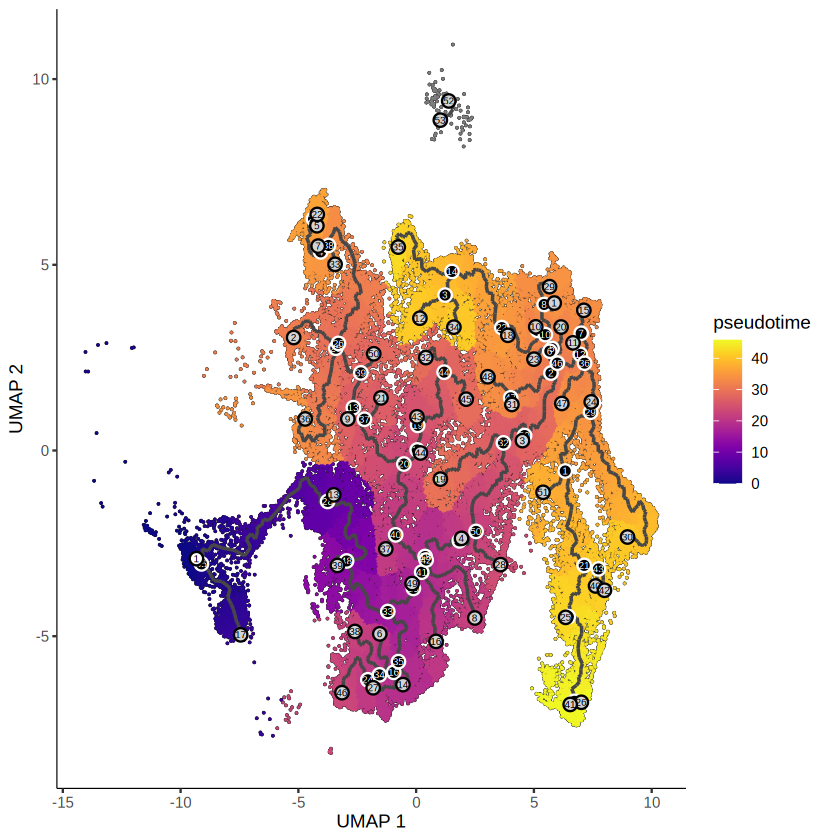

In [23]:
plot_cells(
  cds,
  color_cells_by = "pseudotime",
  label_cell_groups = FALSE,
  label_leaves = TRUE,
  label_branch_points = TRUE
)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


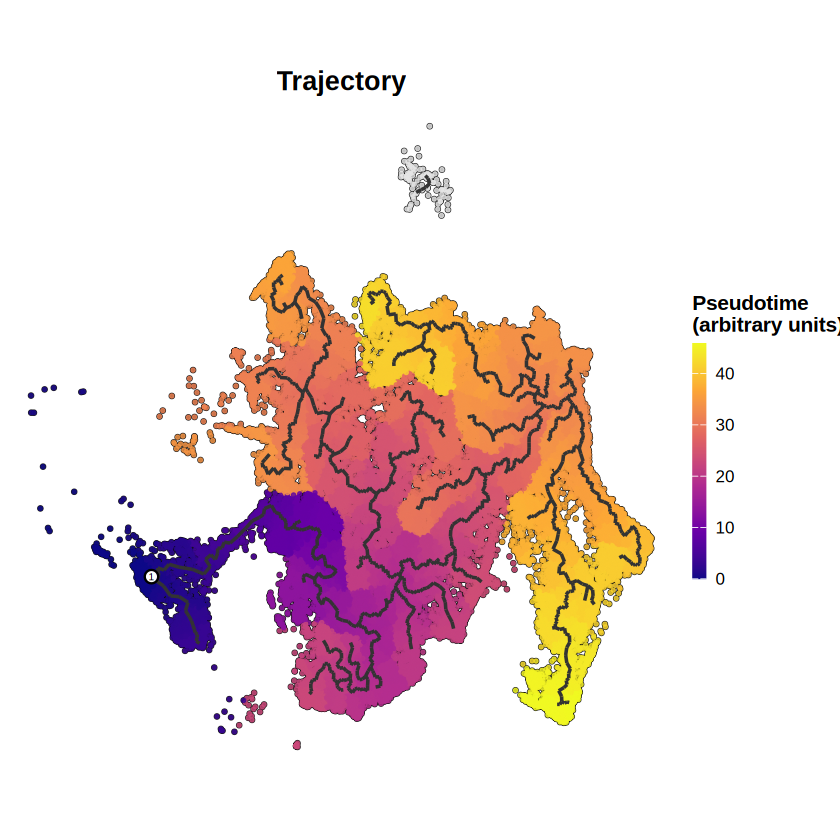

In [24]:
p_traj <- plot_cells(
  cds,
  color_cells_by = "pseudotime",
  
  # A. Refine the Points
  cell_size = 0.7,           # Adjust based on cell count (0.5 for >50k cells)
  alpha = 0.8,               # Slight transparency helps see density
  show_trajectory_graph = TRUE,
  
  # B. Refine the Line (The "Skeleton")
  trajectory_graph_color = "grey20", # Softer than pure black
  trajectory_graph_segment_size = 0.75, # Thinner, elegant line
  
  # C. Labels
  label_cell_groups = FALSE,
  label_groups_by_cluster = FALSE,
  label_leaves = FALSE,       # Often too messy, hide unless critical
  label_branch_points = FALSE # Often too messy, hide unless critical
) +
  
  # 2. COLOR SCALE
  scale_color_viridis_c(
    option = "plasma", 
    name = "Pseudotime\n(arbitrary units)",
    direction = 1, # Dark = Early, Bright = Late
    na.value = "grey90" # Color for cells not in the trajectory (disconnected)
  ) +
  
  # 3. CLEAN THEME
  theme_void() + # Removes axes (standard for UMAP/Trajectories)
  theme(
    # Legend Styling
    legend.position = "right", 
    legend.title = element_text(size = 12, face = "bold", family = "Arial"),
    legend.text = element_text(size = 10, family = "Arial"),
    legend.key.height = unit(1, "cm"), # Long elegant color bar
    legend.key.width = unit(0.3, "cm"),
    
    # Title
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5, family = "Arial"),
    
    # Aspect Ratio
    aspect.ratio = 1
  ) +
  ggtitle("Trajectory")

p_traj

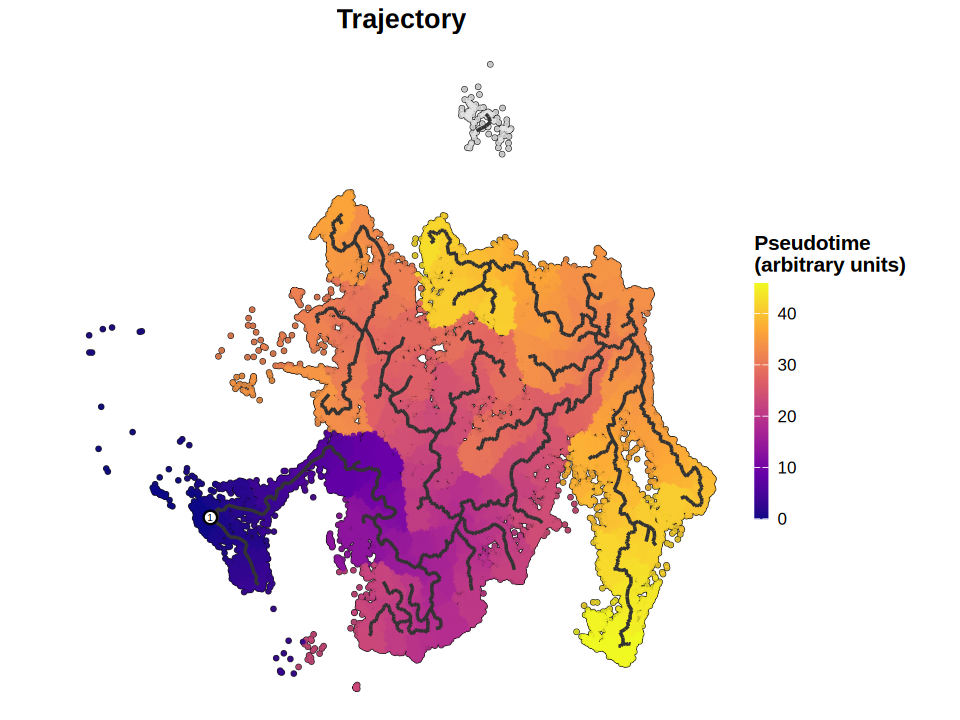

In [25]:
options(repr.plot.width = 8, repr.plot.height = 6)
p_traj

In [26]:
# Save 
ggsave(
  filename = "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/pub_image/Pseudotime_Publication_Ready.png",
  plot = p_traj,
  device = "png",        # Uses svglite if installed
  width = 8,             # Width in inches
  height = 6,            # Height in inches
  units = "in",
  dpi = 600,             # Even for vectors, this sets precision
  bg = "white",          # Ensure background isn't transparent (optional)
  limitsize = FALSE      # Allows saving large files if necessary
)

Cells aren't colored in a way that allows them to be grouped.



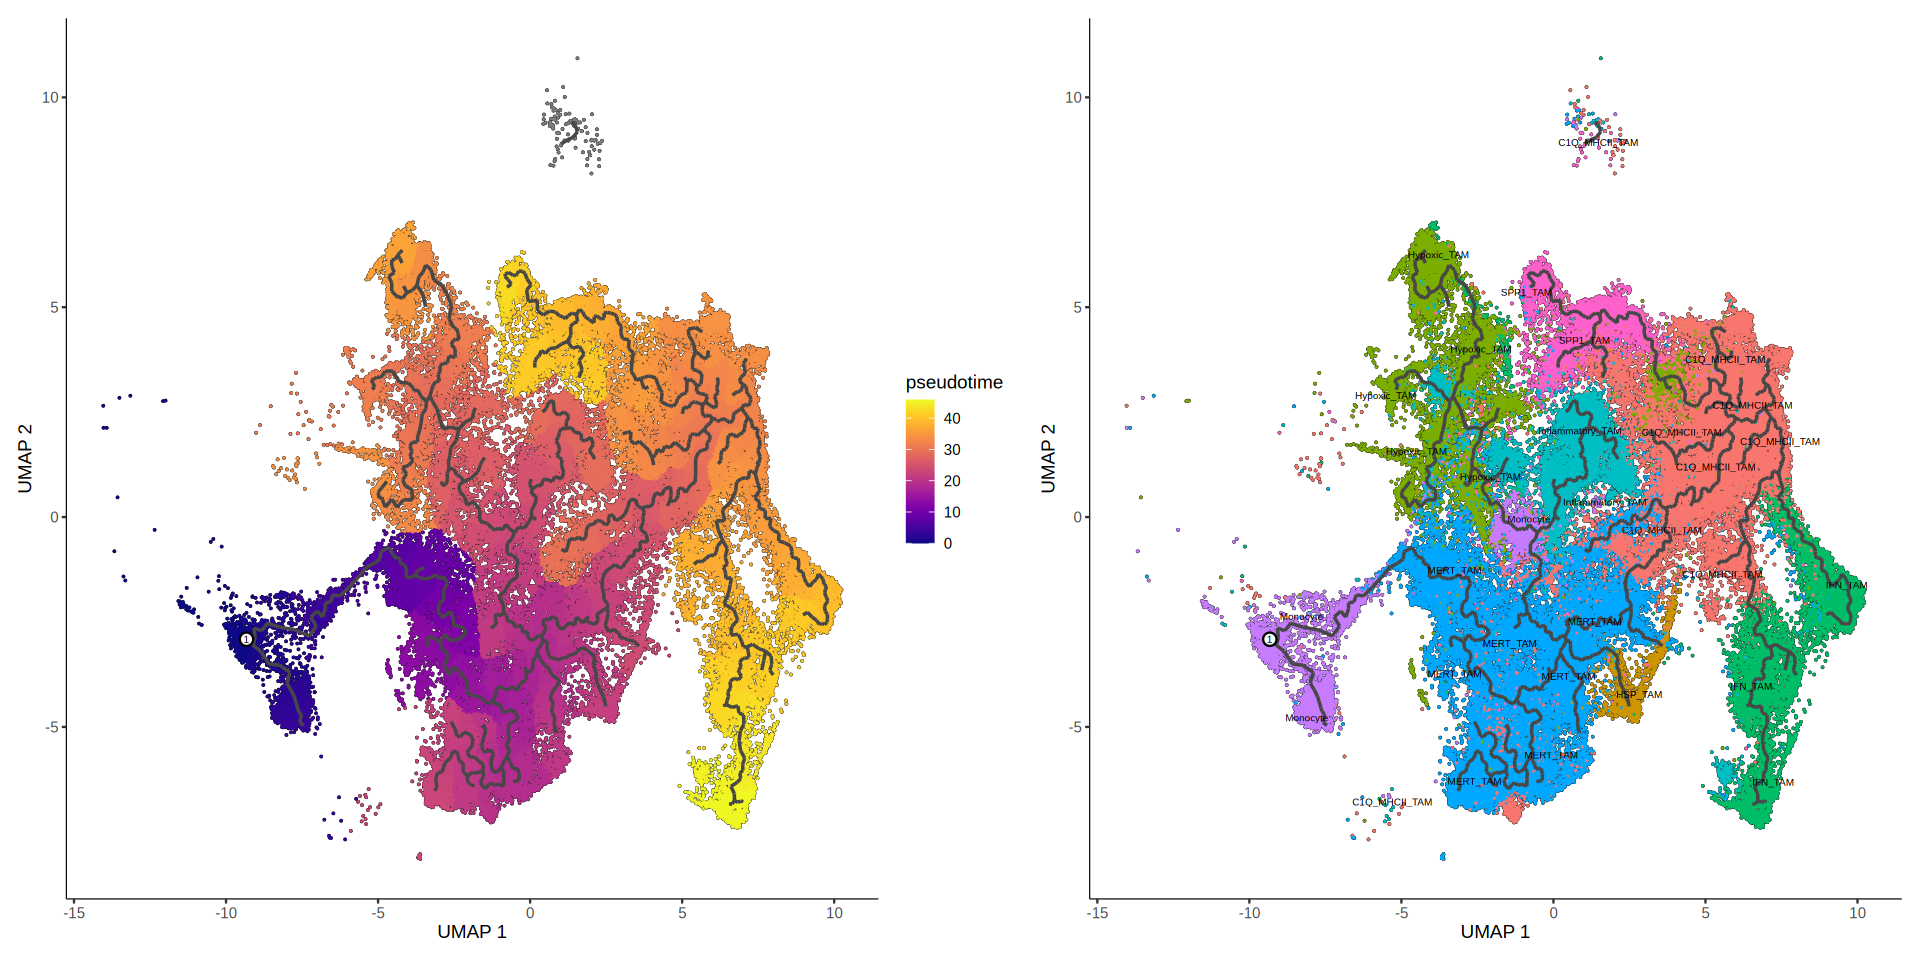

In [27]:
p1_corrected <- plot_cells(
  cds,
  color_cells_by = "pseudotime",
  # REMOVE group_cells_by to avoid the error
  label_cell_groups = TRUE, # Will label based on the color_cells_by variable
  label_leaves = FALSE,
  label_branch_points = FALSE
)

p2 <- plot_cells(
  cds,
  color_cells_by = "general_cell_type",
  label_cell_groups = TRUE,
  label_leaves = FALSE,
  label_branch_points = FALSE
)

options(repr.plot.width = 16, repr.plot.height = 8)
p1_corrected + p2

In [28]:
cds_pt_res <- graph_test(cds, neighbor_graph = "principal_graph", cores = 40)

  |=======================================================| 100%, Elapsed 11:42


In [29]:
cds_pt_res <- na.omit(cds_pt_res)
cds_pt_res <- cds_pt_res[cds_pt_res$p_value < 0.05 & cds_pt_res$status == "OK", ]
cds_pt_res |> head()

status p_value      morans_test_statistic morans_I   
ENSG00000291215 OK     3.068443e-16  8.086569             0.008012803
LINC01409       OK     9.082393e-09  5.628629             0.005582561
LINC00115       OK     1.632922e-20  9.209849             0.009114641
LINC01128       OK     6.305263e-06  4.366756             0.004331170
ENSG00000288531 OK     3.058527e-05  4.008249             0.003773298
FAM41C          OK     2.265474e-26 10.560736             0.010293858
                gene_short_name q_value     
ENSG00000291215 ENSG00000291215 8.493170e-16
LINC01409       LINC01409       2.102041e-08
LINC00115       LINC00115       4.854798e-20
LINC01128       LINC01128       1.317402e-05
ENSG00000288531 ENSG00000288531 6.195013e-05
FAM41C          FAM41C          7.308868e-26

In [30]:
cds_pt_res[order(-cds_pt_res$morans_test_statistic), ] |> head()

status p_value morans_test_statistic morans_I  gene_short_name q_value
S100A8 OK     0       698.0526              0.6951108 S100A8          0      
S100A9 OK     0       595.3031              0.5928097 S100A9          0      
IFI27  OK     0       586.5168              0.5840452 IFI27           0      
CXCL10 OK     0       576.5426              0.5707388 CXCL10          0      
ISG15  OK     0       563.5043              0.5611296 ISG15           0      
FTL    OK     0       558.7495              0.5564271 FTL             0

In [31]:
# Subset the top hits
top_hits <- cds_pt_res[order(cds_pt_res$morans_test_statistic, decreasing = TRUE), ]
head(top_hits, 10)

status p_value morans_test_statistic morans_I  gene_short_name q_value
S100A8  OK     0       698.0526              0.6951108 S100A8          0      
S100A9  OK     0       595.3031              0.5928097 S100A9          0      
IFI27   OK     0       586.5168              0.5840452 IFI27           0      
CXCL10  OK     0       576.5426              0.5707388 CXCL10          0      
ISG15   OK     0       563.5043              0.5611296 ISG15           0      
FTL     OK     0       558.7495              0.5564271 FTL             0      
S100A12 OK     0       510.1538              0.5078556 S100A12         0      
TMSB4X  OK     0       509.1229              0.5070046 TMSB4X          0      
IFITM1  OK     0       501.0663              0.4989295 IFITM1          0      
LYZ     OK     0       496.0815              0.4940118 LYZ             0

In [32]:
# Get top 50 genes based on morans_test_statistic
top_50_genes <- top_hits[1:50,]

# Print the first few rows to verify
head(top_50_genes)

status p_value morans_test_statistic morans_I  gene_short_name q_value
S100A8 OK     0       698.0526              0.6951108 S100A8          0      
S100A9 OK     0       595.3031              0.5928097 S100A9          0      
IFI27  OK     0       586.5168              0.5840452 IFI27           0      
CXCL10 OK     0       576.5426              0.5707388 CXCL10          0      
ISG15  OK     0       563.5043              0.5611296 ISG15           0      
FTL    OK     0       558.7495              0.5564271 FTL             0

In [33]:
write.csv(top_hits, file = "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/trajectory/myeloid_trajectory.csv", row.names = TRUE)

Warning message:
“the ‘subbars’ function has moved to the reformulas package. Please update your imports, or ask an upstream package maintainter to do so.
This warning is displayed once per session.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


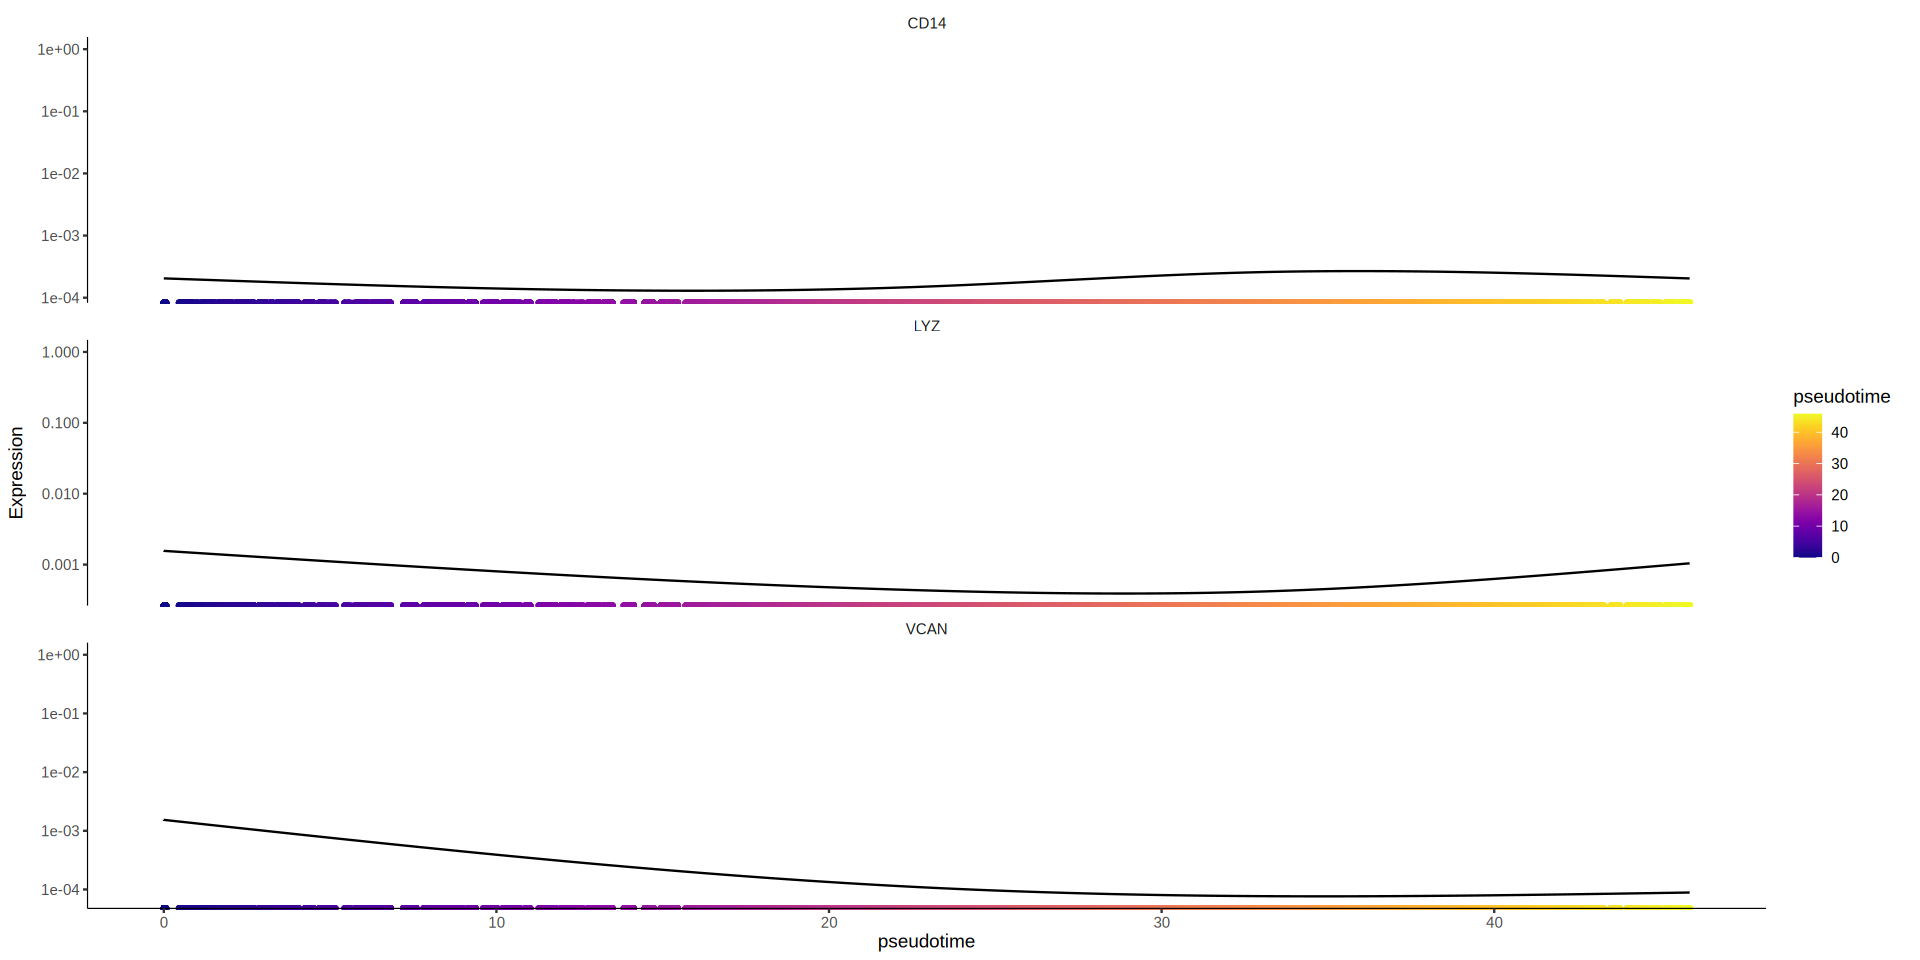

In [34]:
plot_genes_in_pseudotime(
  cds[rowData(cds)$gene_short_name %in% c("CD14", "LYZ", 'VCAN')],
  label_by_short_name = TRUE
)

In [35]:
library(tidyr)

Warning message:
“package ‘tidyr’ was built under R version 4.4.3”

Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


The following object is masked from ‘package:S4Vectors’:

    expand




In [36]:
# Select markers to plot
genes_to_plot <- c("CD14", "CLEC12A",  "JAML", "LYZ", "VCAN")

# Extract expression data and pseudotime
gene_module_df <- as.data.frame(t(as.matrix(logcounts(cds[rowData(cds)$gene_short_name %in% genes_to_plot,]))))
colnames(gene_module_df) <- rowData(cds[rowData(cds)$gene_short_name %in% genes_to_plot,])$gene_short_name

# Add pseudotime information
gene_module_df$pseudotime <- pseudotime(cds)

# Reshape data to long format for plotting
gene_long <- gene_module_df %>%
    pivot_longer(cols = all_of(genes_to_plot),
                             names_to = "Gene",
                             values_to = "Expression")
                             
# # Plot expression trends over pseudotime with improved visualization
# options(repr.plot.width=8, repr.plot.height=3)
# ggplot(gene_long, aes(x = pseudotime, y = Expression, color = Gene)) +
#     geom_point(size = 0.8, alpha = 0.2) +  # Slightly larger points but more transparent
#     geom_smooth(method = "loess", se = TRUE, span = 0.2, linewidth = 1.5) +  # Thicker smoothed lines
#     scale_color_brewer(palette = "Set1") +
#     labs(x = "Pseudotime", y = "Expression level") +
#          #title = "Monocyte Gene Expression along Pseudotime") +
#     theme_minimal() +
#     theme(
#         legend.position = "right",
#         legend.key.size = unit(1.2, "cm"),  # Larger legend keys
#         panel.grid.minor = element_blank(),
#         panel.grid.major = element_line(linewidth = 0.3, color = "grey90"),
#         #plot.title = element_text(size = 16, face = "bold"),
#         axis.title = element_text(size = 14, face = "bold"),
#         axis.text = element_text(size = 12),
#         legend.title = element_text(size = 14, face = "bold"),
#         legend.text = element_text(size = 12)
#     )

In [38]:
p_mono <- ggplot(gene_long, aes(x = pseudotime, y = Expression, color = Gene)) +
    # 1. Points layer
    geom_point(size = 0.8, alpha = 0.2) + 
    
    # 2. Smoothing layer - CHANGED to GAM to fix memory error
    geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), 
                se = TRUE, linewidth = 1.5) + 
    
    scale_color_brewer(palette = "Set1") +
    labs(x = "Pseudotime", y = "Expression level") +
    theme_minimal() +
    theme(
        legend.position = "right",
        legend.key.size = unit(1.2, "cm"),
        panel.grid.minor = element_blank(),
        panel.grid.major = element_line(linewidth = 0.3, color = "grey90"),
        axis.title = element_text(size = 14, face = "bold"),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12)
    )

Warning message:
“Removed 485 rows containing non-finite outside the scale range
(`stat_smooth()`).”


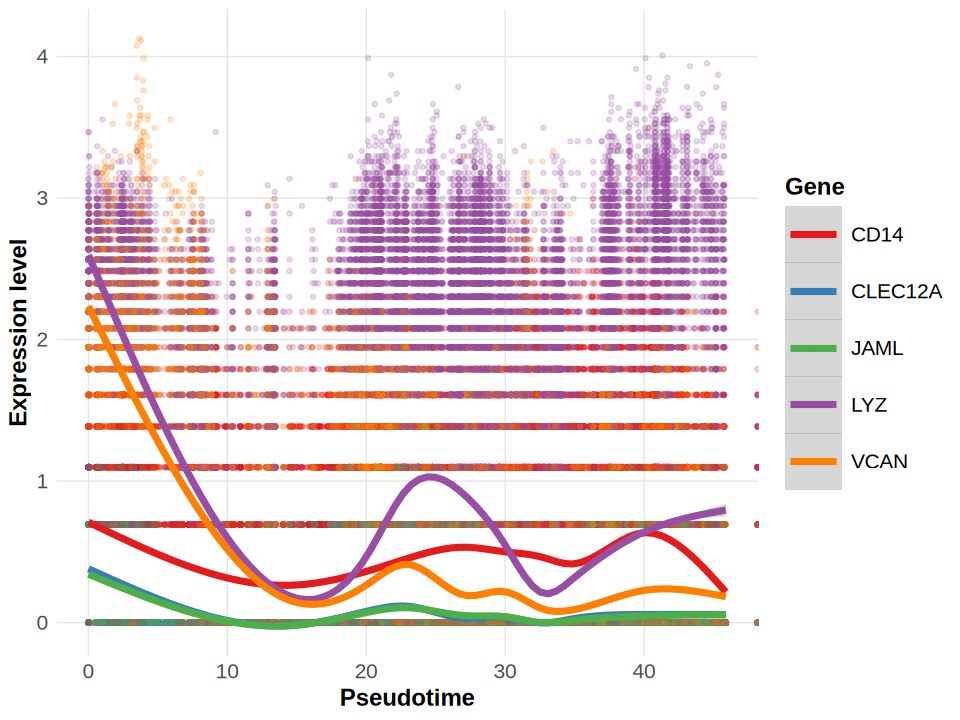

In [39]:
options(repr.plot.width=8, repr.plot.height=6)
p_mono

In [55]:
# Select markers to plot
genes_to_plot <- c("SPP1", "C1QA",  "C1QB", "C1QC")

# Extract expression data and pseudotime
gene_module_df <- as.data.frame(t(as.matrix(logcounts(cds[rowData(cds)$gene_short_name %in% genes_to_plot,]))))
colnames(gene_module_df) <- rowData(cds[rowData(cds)$gene_short_name %in% genes_to_plot,])$gene_short_name

# Add pseudotime information
gene_module_df$pseudotime <- pseudotime(cds)

# Reshape data to long format for plotting
gene_long <- gene_module_df %>%
    pivot_longer(cols = all_of(genes_to_plot),
                             names_to = "Gene",
                             values_to = "Expression")

In [56]:
p_mac <- ggplot(gene_long, aes(x = pseudotime, y = Expression, color = Gene)) +
    # 1. Points layer
    geom_point(size = 0.8, alpha = 0.2) + 
    
    # 2. Smoothing layer - CHANGED to GAM to fix memory error
    geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), 
                se = TRUE, linewidth = 1.5) + 
    
    scale_color_brewer(palette = "Set1") +
    labs(x = "Pseudotime", y = "Expression level") +
    theme_minimal() +
    theme(
        legend.position = "right",
        legend.key.size = unit(1.2, "cm"),
        panel.grid.minor = element_blank(),
        panel.grid.major = element_line(linewidth = 0.3, color = "grey90"),
        axis.title = element_text(size = 14, face = "bold"),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12)
    )

Warning message:
“Removed 388 rows containing non-finite outside the scale range
(`stat_smooth()`).”


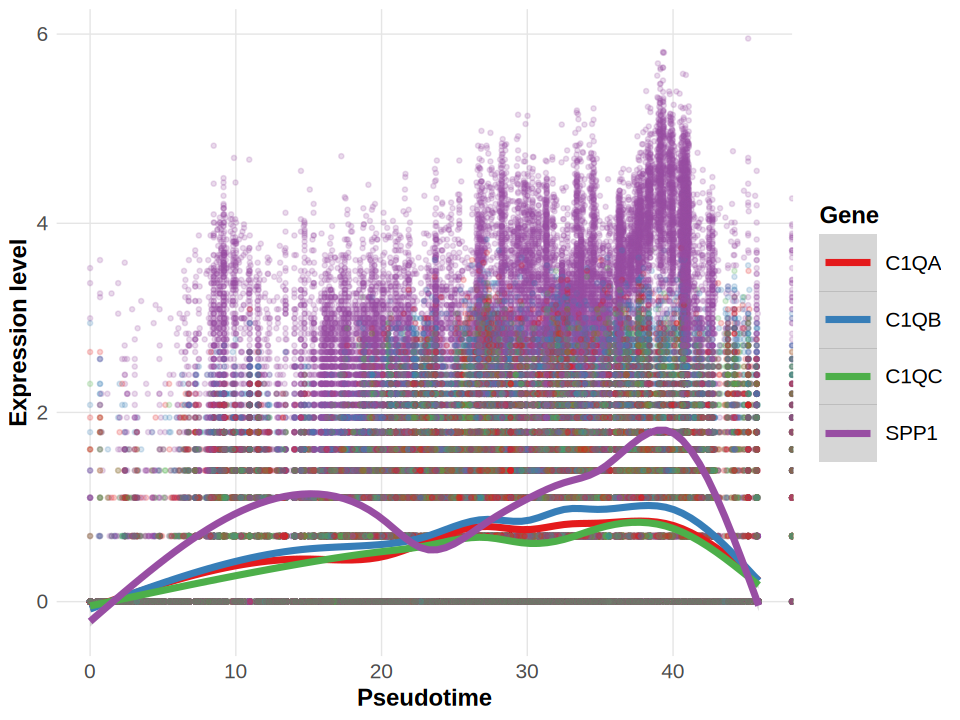

In [59]:
options(repr.plot.width=8, repr.plot.height=6)
p_mac

Warning message:
“Removed 485 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 388 rows containing non-finite outside the scale range
(`stat_smooth()`).”


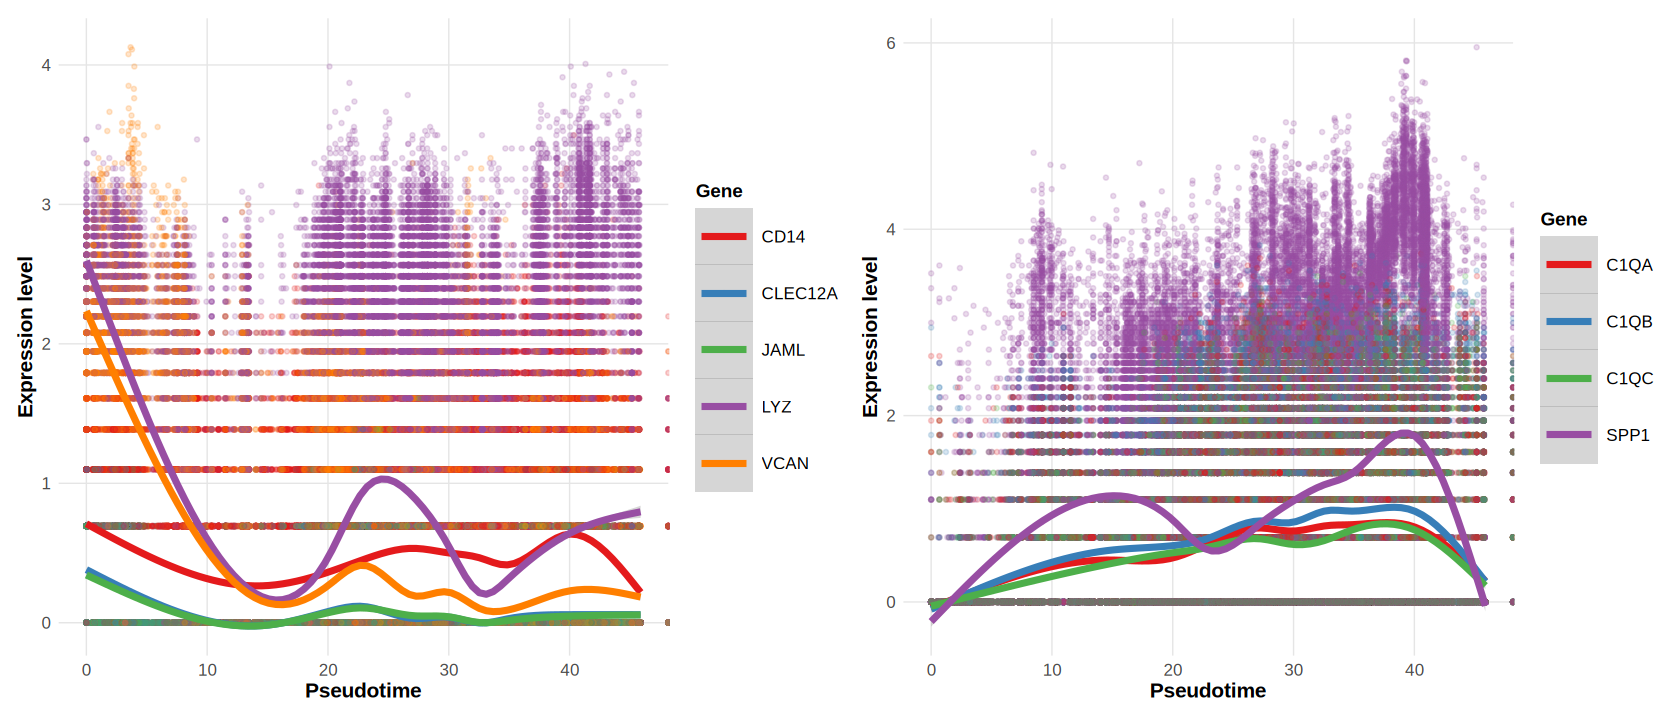

In [60]:
p_combined <- p_mono + p_mac +
    plot_layout(ncol = 2) &
    theme(
        plot.title = element_text(size = 14, face = "bold", family = "Arial"),
        axis.title = element_text(size = 12, face = "bold", family = "Arial"),
        axis.text = element_text(size = 10, family = "Arial"),
        legend.title = element_text(size = 11, face = "bold", family = "Arial"),
        legend.text = element_text(size = 10, family = "Arial")
    )

options(repr.plot.width = 14, repr.plot.height = 6)
p_combined

# Save publication-ready figure
# ggsave(
#     filename = "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/pub_image/Gene_Expression_Pseudotime_Publication_Ready.png",
#     plot = p_combined,
#     device = "png",
#     width = 14,
#     height = 6,
#     units = "in",
#     dpi = 600,
#     bg = "white",
#     limitsize = FALSE
# )

In [62]:
df <- data.frame(
  cell = colnames(cds),
  pseudotime = pseudotime(cds),
  general_cell_type = colData(cds)$general_cell_type
) %>% 
  filter(is.finite(pseudotime)) %>%
  mutate(pt_bin = cut(pseudotime, breaks = 20, include.lowest = TRUE))

pt_comp <- df %>%
  count(pt_bin, general_cell_type) %>%
  group_by(pt_bin) %>%
  mutate(frac = n / sum(n)) %>%
  ungroup()

p_comp <- ggplot(pt_comp, aes(x = pt_bin, y = frac, fill = general_cell_type, group = general_cell_type)) +
  geom_area(position = "stack", alpha = 0.9) +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(x = "Pseudotime (binned)", y = "Cell-type fraction", fill = "General cell type") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

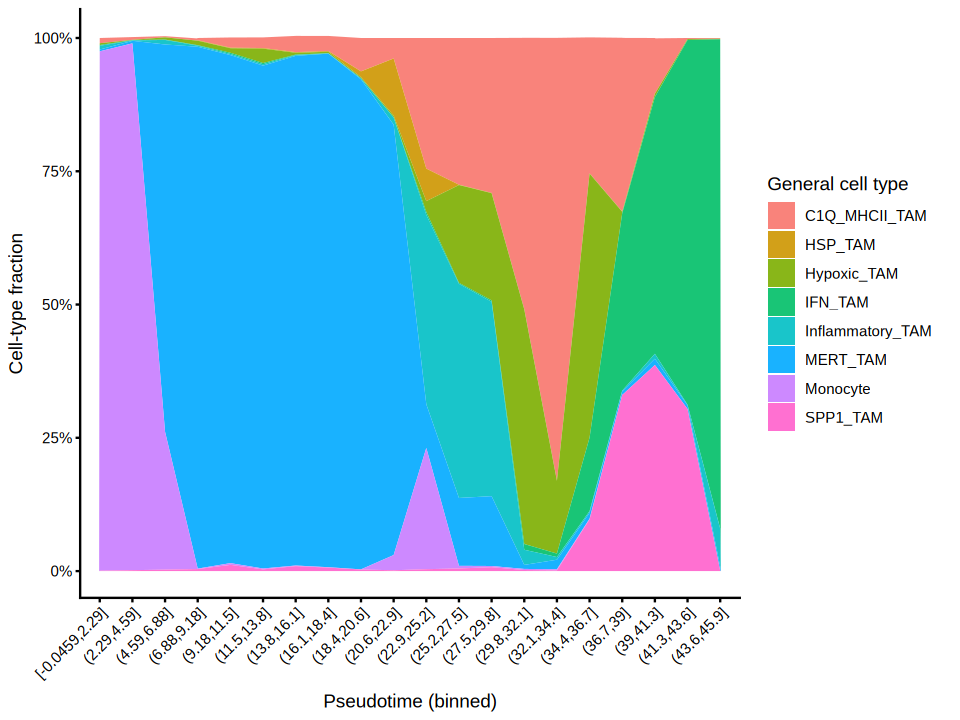

In [63]:
options(repr.plot.width=8, repr.plot.height=6)
p_comp

In [71]:
cds$general_cell_type |> unique()

[1] "C1Q_MHCII_TAM"    "MERT_TAM"         "Hypoxic_TAM"      "SPP1_TAM"        
[5] "Monocyte"         "Inflammatory_TAM" "IFN_TAM"          "HSP_TAM"

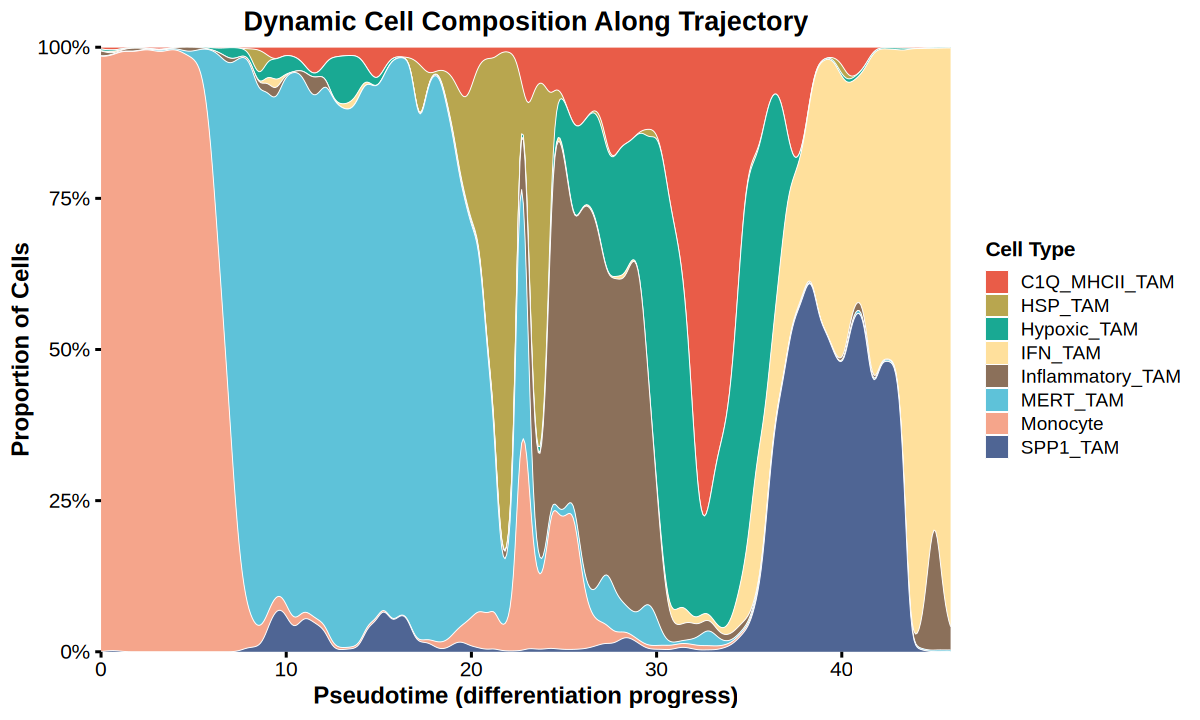

In [73]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(scales)
# library(zoo) # Optional: if moving averages are preferred over density

# 1. Data Preparation
# We don't just 'cut' the data. We want density estimates across the numeric range.
df <- data.frame(
  cell = colnames(cds),
  pseudotime = pseudotime(cds),
  general_cell_type = colData(cds)$general_cell_type
) %>% 
  filter(is.finite(pseudotime))

# 2. Define High-Quality Colors (Ensure these match your other figures)
# Example: Nature Immunology style palette
custom_colors <- c(
  # --- Myeloid Categories (All mapped to #E64B35) ---
  "C1Q_MHCII_TAM" = "#E64B35",  # Color for Myeloid
  "MERT_TAM" = "#4DBBD5",       # Color for Myeloid
  "Hypoxic_TAM" = "#00A087",    # Color for Myeloid
  "SPP1_TAM" = "#3C5488",       # Color for Myeloid
  "Monocyte" = "#F39B7F",       # Color for Myeloid
  "Inflammatory_TAM" = "#7E6148",# Color for Myeloid
  "IFN_TAM" = "#FFDC91",        # Color for Myeloid
  "HSP_TAM" = "#B09C3C")
# Note: Ensure names match your actual 'general_cell_type' levels exactly.

# 3. Create the Smooth Visualization
# We use 'stat = "count"' combined with geom_density or geom_area logic manually
# But the cleanest way in ggplot is geom_density(position = "fill")

options(repr.plot.width = 10, repr.plot.height = 6)

p_stream <- ggplot(df, aes(x = pseudotime, fill = general_cell_type)) +
  
  # GEOM LAYER: 
  # position = "fill" converts counts to relative proportions (0-100%) at every point.
  # bw = "SJ" or adjustment (adjust = 1.5) creates a smoother curve than default.
  geom_density(position = "fill", alpha = 0.9, color = "white", size = 0.2) +
  
  # SCALES
  scale_fill_manual(values = custom_colors) +
  scale_y_continuous(labels = scales::percent_format(), expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) + # Removes gap between plot and axis
  
  # LABELS
  labs(
    title = "Dynamic Cell Composition Along Trajectory",
    x = "Pseudotime (differentiation progress)", 
    y = "Proportion of Cells", 
    fill = "Cell Type"
  ) +
  
  # THEME
  theme_classic(base_size = 14) +
  theme(
    # Typography
    text = element_text(family = "Arial", color = "black"),
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    
    # Axes
    axis.text = element_text(color = "black", size = 12),
    axis.title = element_text(face = "bold", size = 14),
    axis.line = element_blank(), # Remove axis lines for a "Full Box" look if preferred
    
    # Legend
    legend.position = "right",
    legend.key.size = unit(0.5, "cm"),
    legend.title = element_text(face = "bold", size = 12)
  )

print(p_stream)
# ggsave("Pseudotime_Composition_Stream.pdf", p_stream, width = 10, height = 6, device = cairo_pdf)

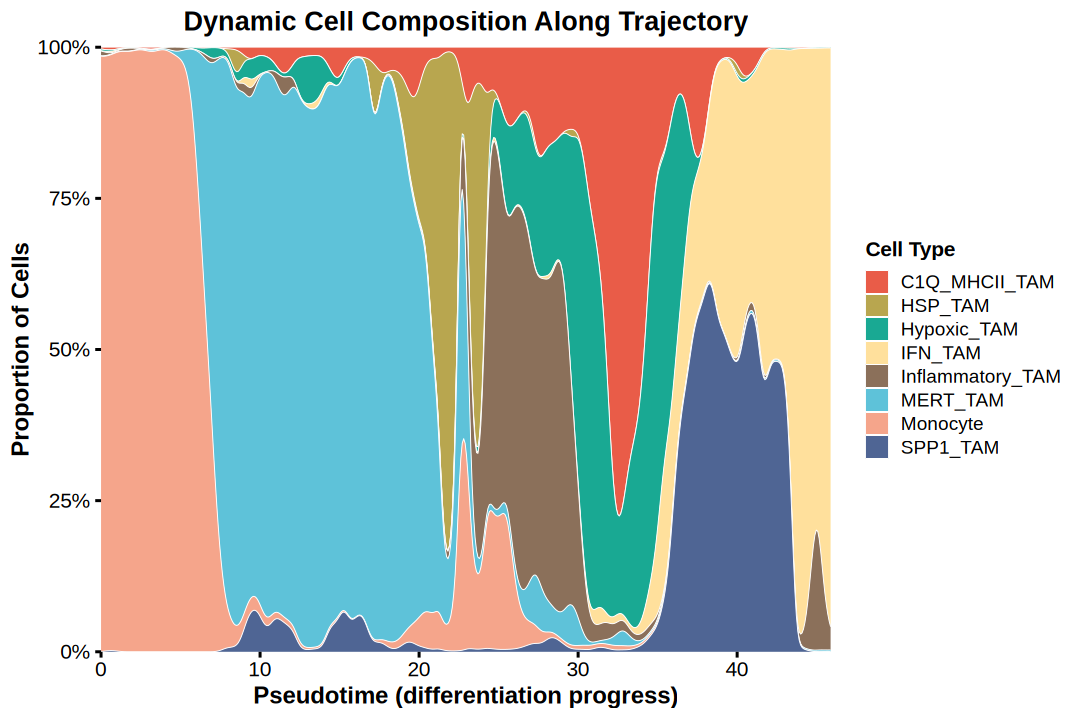

In [77]:
options(repr.plot.width = 9, repr.plot.height = 6)
p_stream